1.Load data

In [2]:
import pandas as pd
# Load the dataset
#data = pd.read_csv('Dataset1_Weatherdata.csv')
data = pd.read_csv("Data/All_data.csv")
print(data.head())

   ST04   K  SMV01  SMV10  CRP  SMV20   N  ST04.1  ST01  PRCPC  ...    T0  \
0  20.5  13  0.388  0.435    0  0.437  21   174.0  20.6  79.17  ...  20.7   
1  20.5  13  0.385  0.434    0  0.437  21   173.6  20.6  16.67  ...  20.8   
2  20.5  13  0.378  0.433    0  0.437  21   173.2  20.8  20.83  ...  21.1   
3  20.5  13  0.371  0.431    0  0.437  21   172.5  20.7  33.33  ...  20.8   
4  19.5   7  0.413  0.440    0  0.413  21   176.2  19.6   4.17  ...  19.6   

   VIS  District  preciptype  TMIN  CEC  TEMP  SLT  UVI   SM01  
0  NaN      Huye        rain  15.2   13  19.7   18   10  124.6  
1  NaN      Huye        rain  14.9   13  20.0   18   10  123.9  
2  NaN      Huye        rain  13.9   13  20.3   18   10  123.2  
3  NaN      Huye        rain  13.8   13  20.2   18   10  122.4  
4  9.5    Nyanza        rain  16.6   26  22.5   26   10  129.4  

[5 rows x 54 columns]


2. Data processing


In [3]:
# Drop unnecessary columns (District, Center, etc.)
data_cleaned = data.drop(columns=['District', 'Center','preciptype','VIS'])

# Encode categorical variables, such as 'Crop_inter'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['CRP'] = label_encoder.fit_transform(data_cleaned['CRP'])

# Display cleaned data
print(data_cleaned.head())

   ST04   K  SMV01  SMV10  CRP  SMV20   N  ST04.1  ST01  PRCPC  ...     SLP  \
0  20.5  13  0.388  0.435    0  0.437  21   174.0  20.6  79.17  ...  1013.0   
1  20.5  13  0.385  0.434    0  0.437  21   173.6  20.6  16.67  ...  1012.8   
2  20.5  13  0.378  0.433    0  0.437  21   173.2  20.8  20.83  ...  1013.4   
3  20.5  13  0.371  0.431    0  0.437  21   172.5  20.7  33.33  ...  1014.0   
4  19.5   7  0.413  0.440    0  0.413  21   176.2  19.6   4.17  ...  1018.5   

   WGST   SOLR    T0  TMIN  CEC  TEMP  SLT  UVI   SM01  
0  34.6  293.6  20.7  15.2   13  19.7   18   10  124.6  
1  41.4  285.1  20.8  14.9   13  20.0   18   10  123.9  
2  42.1  301.4  21.1  13.9   13  20.3   18   10  123.2  
3  29.2  270.6  20.8  13.8   13  20.2   18   10  122.4  
4  32.0  293.6  19.6  16.6   26  22.5   26   10  129.4  

[5 rows x 50 columns]


Handle missing values

Double-Check Missing Values: Verify if there are still NaN values in X after filling:

In [4]:
import numpy as np

# Check for NaNs in X
if isinstance(data_cleaned, pd.DataFrame):
    print(data_cleaned.isna().sum())
else:
    print(np.isnan(X).sum(axis=0))

ST04          0
K             0
SMV01         0
SMV10         0
CRP           0
SMV20         0
N             0
ST04.1        0
ST01          0
PRCPC         0
Yield         0
snow          0
ST20          0
P             0
BDN           0
MON           0
MAP           0
ELV           0
TN            0
OC            0
PRCP          0
HUM           0
SM10          0
FL            0
CLY           0
ST10          0
WDIR          0
CLDC          0
FLMAX         0
LAT           0
SOLE          0
snowdepth     0
SND           0
TMAX          0
WSPD          0
FLMIN         0
LONG          0
DEW           0
precipprob    0
SMV04         0
SLP           0
WGST          0
SOLR          0
T0            0
TMIN          0
CEC           0
TEMP          0
SLT           0
UVI           0
SM01          0
dtype: int64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


Mutual Information 

In [23]:
from sklearn.feature_selection import mutual_info_regression

num_top_features=54

# Separate features and target (assuming 'Yield' is the target column)
X = data_cleaned.drop(columns=['Yield'])
y = data_cleaned['Yield']

# Calculate Information Gain (Mutual Information for regression)
information_gain = mutual_info_regression(X, y)

# Create a DataFrame to store Information Gain scores
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information_Gain': information_gain})
info_gain_df = info_gain_df.sort_values(by='Information_Gain', ascending=False)

# Select the top features
top_features_df = info_gain_df.head(num_top_features)



Create the sorted data

In [31]:
# Get the list of top features in the correct order
top_features_ordered = top_features_df['Feature'].tolist()

new_data = data[top_features_ordered + ['Yield']]  # Keep Yield at the end

# (Optional) Save the new dataset to a file
new_data.to_csv("Data/mi_ranked_data.csv", index=False)


F-regression 

In [24]:
from sklearn.feature_selection import f_regression

# Separate features and target (assuming 'Yield' is the target column)
X = data_cleaned.drop(columns=['Yield'])
y = data_cleaned['Yield']

# Calculate F-statistic and p-values for regression
f_scores, _ = f_regression(X, y)

# Create a DataFrame to store F-scores
f_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores})
f_scores_df = f_scores_df.sort_values(by='F_Score', ascending=False)

# Select the top features
top_features_fr = f_scores_df.head(num_top_features)



In [29]:
# Get the list of top features in the correct order
top_features_fr_ordered = top_features_fr['Feature'].tolist()

# Create the new dataset from the original data (not data_cleaned)
data = pd.read_csv("Data/All_data.csv")  # Reload if needed
new_data = data[top_features_fr_ordered + ['Yield']]  # Keep Yield at the end
# (Optional) Save the new dataset to a file
new_data.to_csv("Data/f_regression_ranked_data.csv", index=False)

Hybrid mutal and f regresion 

In [15]:

from sklearn.feature_selection import mutual_info_regression, f_regression

# Create a DataFrame to store the scores
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Information_Gain': information_gain,
    'F_Score': f_scores
})

# Normalize the scores for comparison
features_df['Normalized_MI'] = (features_df['Information_Gain'] - features_df['Information_Gain'].min()) / (features_df['Information_Gain'].max() - features_df['Information_Gain'].min())
features_df['Normalized_F'] = (features_df['F_Score'] - features_df['F_Score'].min()) / (features_df['F_Score'].max() - features_df['F_Score'].min())

# Combine the normalized scores 
features_df['Combined_Score'] = (0.5*features_df['Normalized_MI'] + 0.5*features_df['Normalized_F'])



Rank By Comnined scores 

In [27]:
# Rank features by combined score
features_df = features_df.sort_values(by='Combined_Score', ascending=False)



In [30]:
# Get the list of features ranked by combined score
ranked_features = features_df['Feature'].tolist()

# Create a new DataFrame with the features ranked by combined score
# Include the 'Yield' column to keep it in the dataset
ranked_data = data[ranked_features + ['Yield']]

# Optionally, save this ranked dataset to a CSV file
ranked_data.to_csv("Data/hmf_ranked.csv", index=False)

Normalization 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

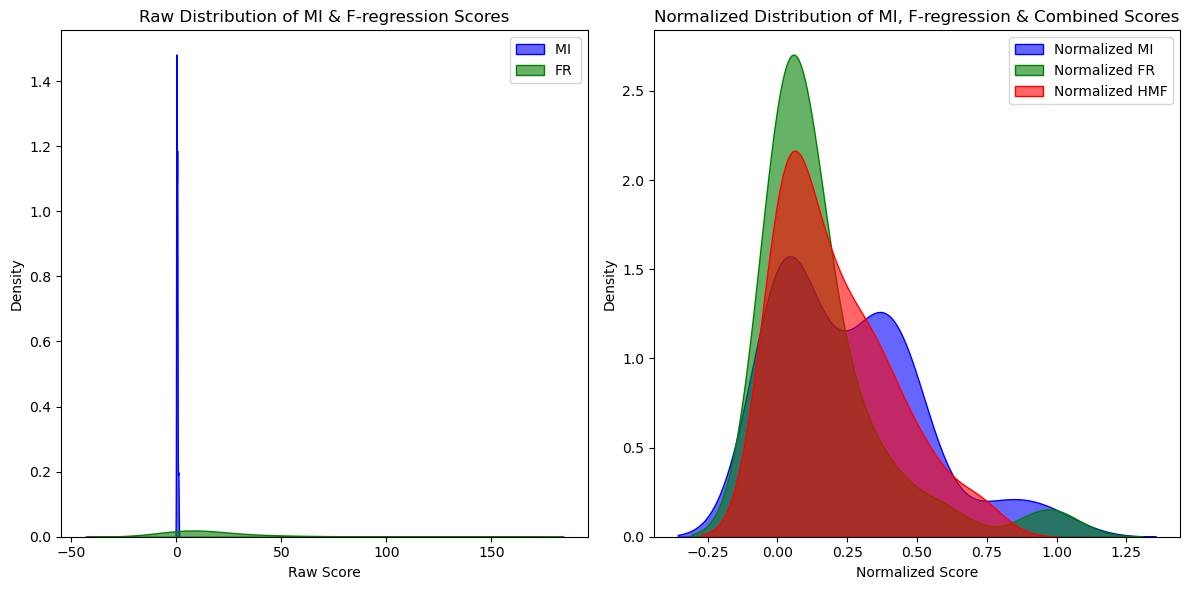

In [11]:
# Plot raw distributions
plt.figure(figsize=(12, 6))

# Raw distribution plot (unchanged)
plt.subplot(1, 2, 1)
sns.kdeplot(features_df['Information_Gain'], fill=True, color='blue', label="MI ", alpha=0.6)
sns.kdeplot(features_df['F_Score'], fill=True, color='green', label="FR", alpha=0.6)
plt.xlabel('Raw Score')
plt.ylabel('Density')
plt.title('Raw Distribution of MI & F-regression Scores')
plt.legend()

# Normalized distribution plot (with normalized combined score)
plt.subplot(1, 2, 2)
sns.kdeplot(features_df['Normalized_MI'], fill=True, color='blue', label="Normalized MI", alpha=0.6)
sns.kdeplot(features_df['Normalized_F'], fill=True, color='green', label="Normalized FR", alpha=0.6)
sns.kdeplot(features_df['Combined_Score'], fill=True, color='red', label="Normalized HMF", alpha=0.6)  # Adding normalized combined score
plt.xlabel('Normalized Score')
plt.ylabel('Density')
plt.title('Normalized Distribution of MI, F-regression & Combined Scores')
plt.legend()

plt.tight_layout()
plt.show()


Models evaluation evalution under different subsets

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


 Feature Set Model            R²          MSE
All Features    RF  8.652651e-01 1.292764e-12
All Features    GB  8.619347e-01 1.324719e-12
All Features   PLS  4.378464e-01 5.393794e-12
All Features   SVR -5.634745e+00 6.365954e-11
All Features   ANN -7.140670e+11 6.851383e+00
   Random 20    RF  8.745598e-01 1.203583e-12
   Random 20    GB  8.529741e-01 1.410695e-12
   Random 20   PLS  4.594874e-01 5.186151e-12
   Random 20   SVR -5.634745e+00 6.365954e-11
   Random 20   ANN -1.594355e+10 1.529763e-01
   Random 20    RF  8.269491e-01 1.660402e-12
   Random 20    GB  8.352263e-01 1.580983e-12
   Random 20   PLS  3.876014e-01 5.875888e-12
   Random 20   SVR -5.634745e+00 6.365954e-11
   Random 20   ANN -3.277594e+10 3.144810e-01
   Random 20    RF  8.601305e-01 1.342031e-12
   Random 20    GB  8.536327e-01 1.404376e-12
   Random 20   PLS  4.120531e-01 5.641277e-12
   Random 20   SVR -5.634745e+00 6.365954e-11
   Random 20   ANN -4.386978e+10 4.209250e-01
   Random 20    RF  8.342587e-01 1

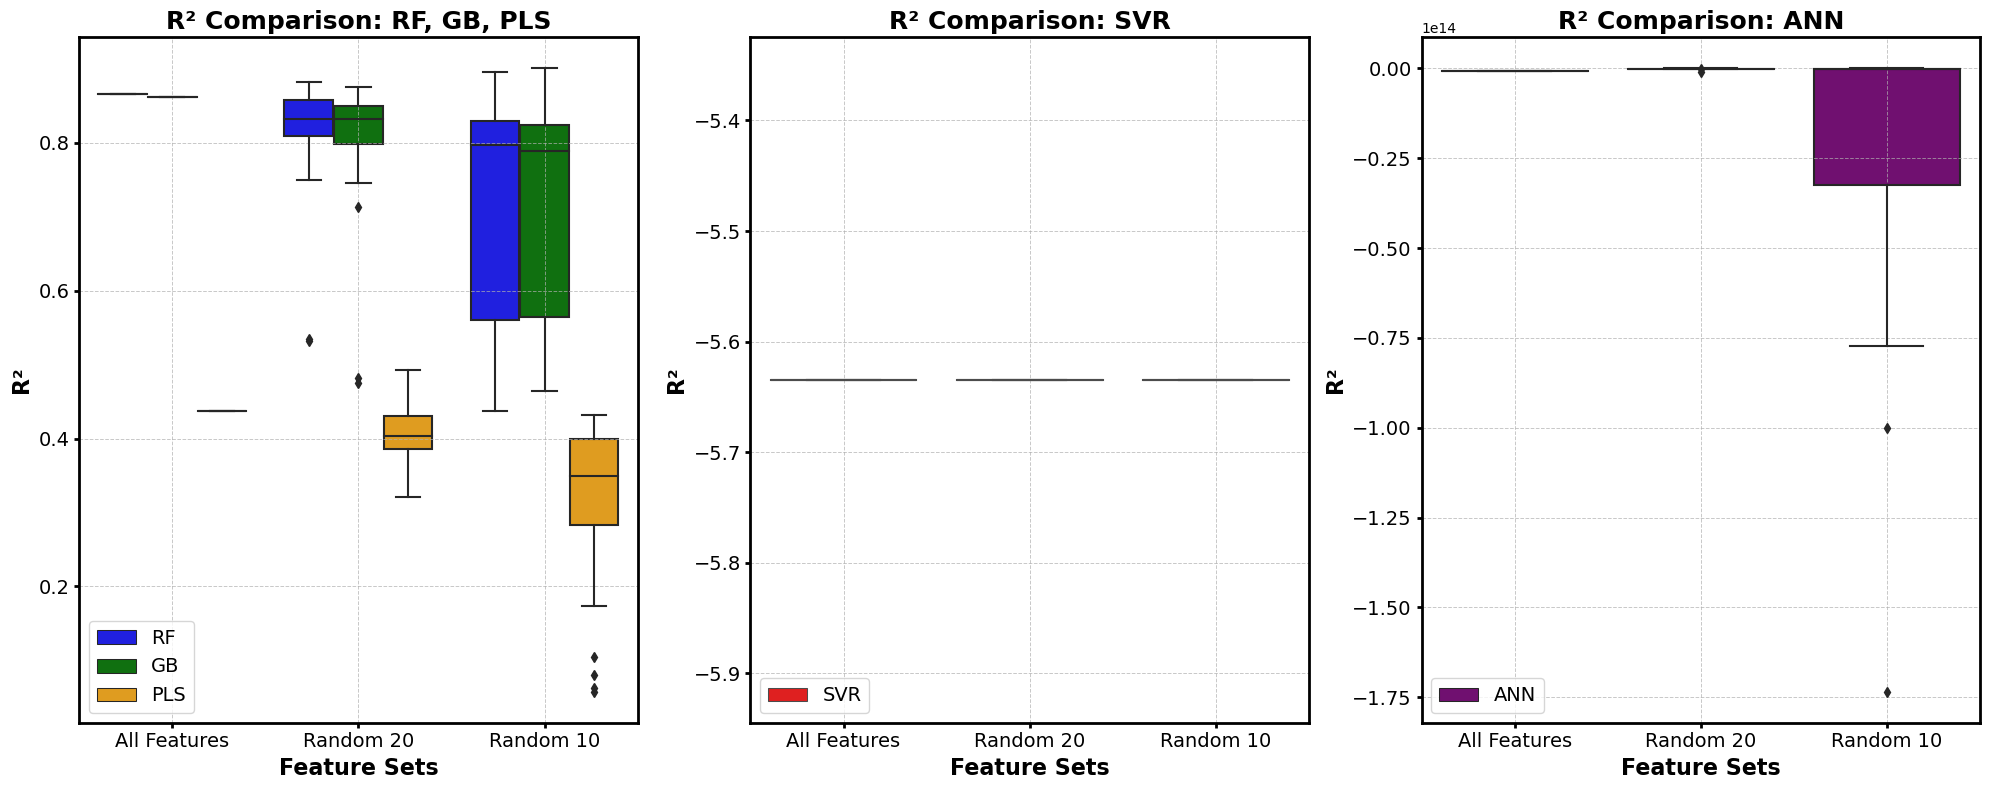

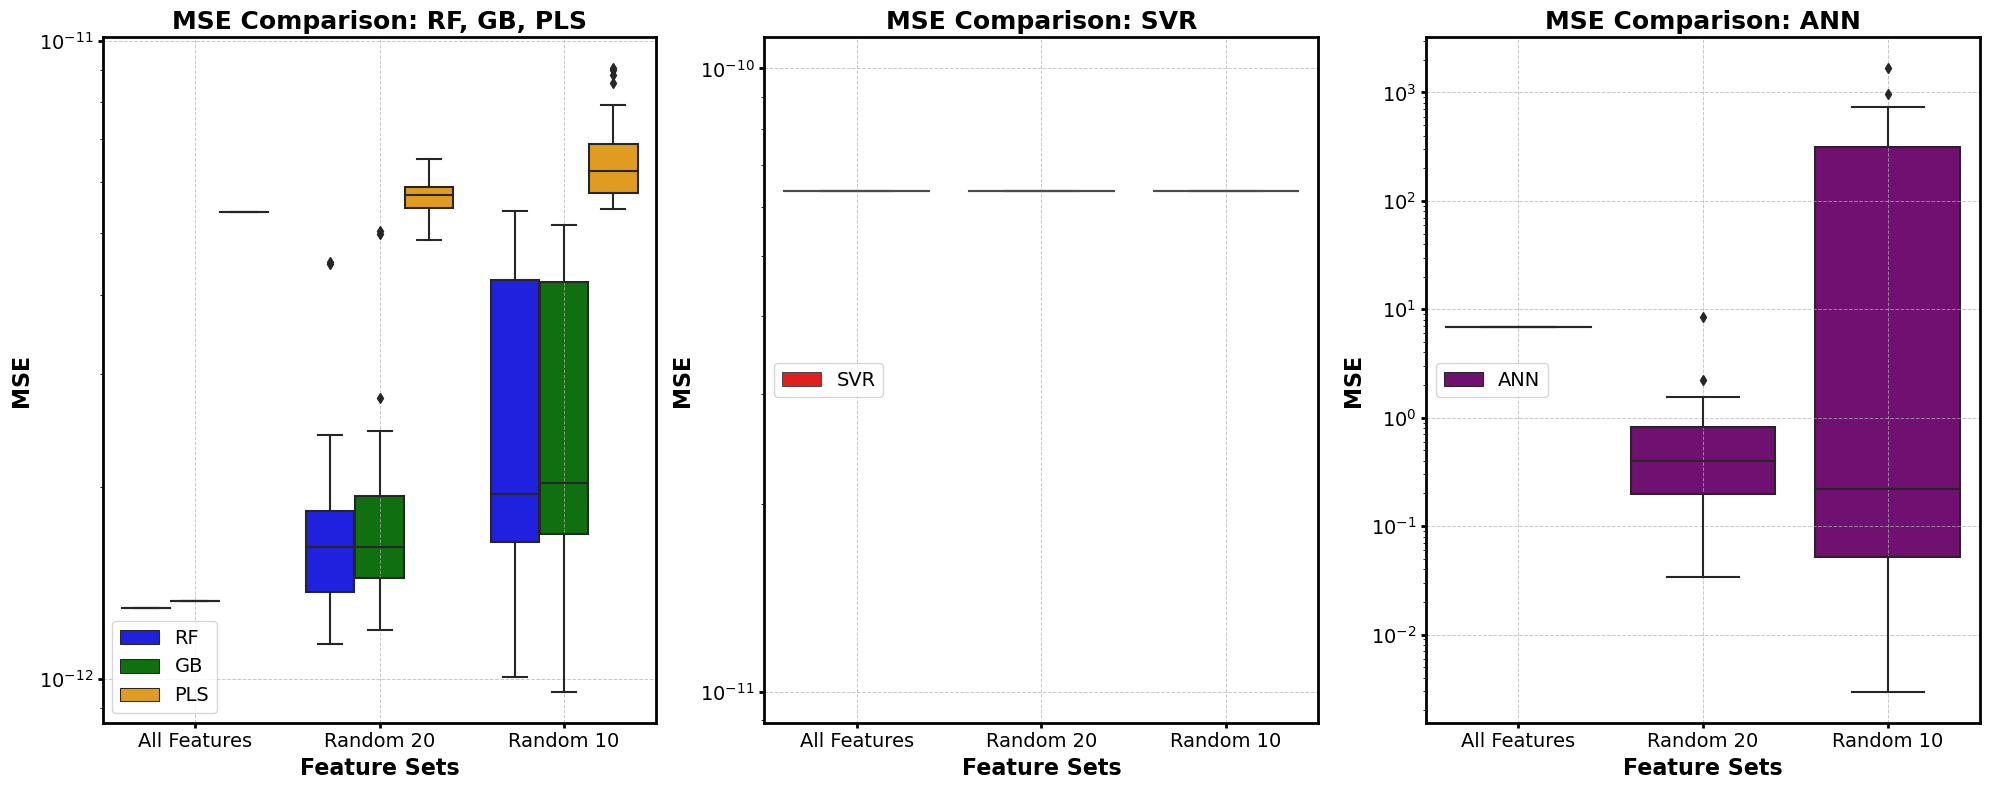

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "RF": RandomForestRegressor(random_state=42),
    "GB": GradientBoostingRegressor(random_state=42),
    "PLS": PLSRegression(n_components=2),
    "SVR": SVR(),
    "ANN": MLPRegressor(random_state=42, max_iter=500)
}

def evaluate_model(X_train, X_test, y_train, y_test, models, feature_subset):
    results = []
    for name, model in models.items():
        try:
            model.fit(X_train[feature_subset], y_train)
            y_pred = model.predict(X_test[feature_subset])
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            results.append((name, r2, mse))
        except Exception:
            results.append((name, np.nan, np.nan))
    return results

all_features_results = evaluate_model(X_train, X_test, y_train, y_test, models, X.columns)

def evaluate_random_features(X, num_features, num_sets=50):
    np.random.seed(42)
    results = []
    feature_names = list(X.columns)
    for _ in range(num_sets):
        selected_features = np.random.choice(feature_names, num_features, replace=False)
        results.extend(evaluate_model(X_train, X_test, y_train, y_test, models, list(selected_features)))
    return results

random_20_results = evaluate_random_features(X, 20)
random_10_results = evaluate_random_features(X, 10)

all_results = [('All Features', *res) for res in all_features_results]
all_results += [('Random 20', *res) for res in random_20_results]
all_results += [('Random 10', *res) for res in random_10_results]

results_df = pd.DataFrame(all_results, columns=['Feature Set', 'Model', 'R²', 'MSE'])
print(results_df.to_string(index=False))

# Define custom colors
model_colors = {
    "RF": "blue",
    "GB": "green",
    "PLS": "orange",
    "SVR": "red",
    "ANN": "purple"
}

group1 = results_df[results_df['Model'].isin(["RF", "GB", "PLS"])]
group2 = results_df[results_df['Model'] == "SVR"]
group3 = results_df[results_df['Model'] == "ANN"]

# Plot R² Comparison
fig_r2, axes_r2 = plt.subplots(1, 3, figsize=(20, 8))
for ax, group, title in zip(axes_r2, [group1, group2, group3], ['RF, GB, PLS', 'SVR', 'ANN']):
    sns.boxplot(data=group, x='Feature Set', y='R²', hue='Model', ax=ax, palette=model_colors)
    ax.set_title(f'R² Comparison: {title}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Feature Sets', fontsize=16, fontweight='bold')
    ax.set_ylabel('R²', fontsize=16, fontweight='bold')
    ax.tick_params(axis='both', labelsize=14, width=2)
    ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.legend( loc='lower left' if title == 'RF, GB, PLS' else 'lower left', fontsize=14, frameon=True)

plt.tight_layout()
plt.savefig("r2_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot MSE Comparison
fig_mse, axes_mse = plt.subplots(1, 3, figsize=(20, 8))
for ax, group, title in zip(axes_mse, [group1, group2, group3], ['RF, GB, PLS', 'SVR', 'ANN']):
    sns.boxplot(data=group, x='Feature Set', y='MSE', hue='Model', ax=ax, palette=model_colors)
    ax.set_title(f'MSE Comparison: {title}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Feature Sets', fontsize=16, fontweight='bold')
    ax.set_ylabel('MSE', fontsize=16, fontweight='bold')
    ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=14, width=2)
    ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.legend(loc='lower left' if title == 'RF, GB, PLS' else 'center left', fontsize=14, frameon=True)

plt.tight_layout()
plt.savefig("mse_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


Performing zone Identification 

In [14]:
df = pd.read_csv("Data/RF_SELECTION_METHODS_EVALUATION.csv", encoding='ISO-8859-1')#contain all MSE AND R2 for all features extraction methods by importance
# Load the dataset


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

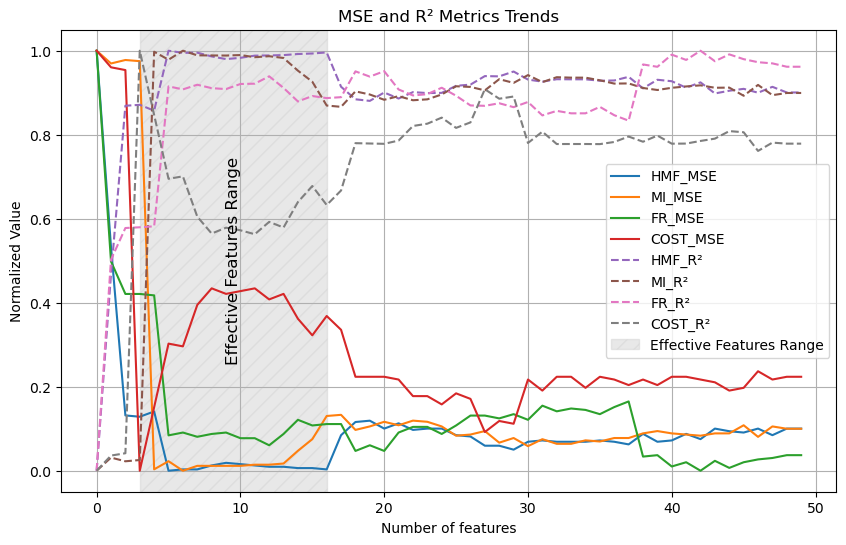

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#df = pd.read_csv("RF_SELECTION_METHODS_EVALUATION.csv")\  # Replace with your actual file name

# Select relevant columns for MSE and R²
mse_columns = ['HMF_MSE', 'MI_MSE', 'FR_MSE', 'COST_MSE']
r2_columns = ['HMF_R²', 'MI_R²', 'FR_R²', 'COST_R²']

# Min-Max Normalization
df_normalized = df.copy()
for col in mse_columns + r2_columns:
    df_normalized[col + '_normalized'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Create the plot
plt.figure(figsize=(10, 6))

# Plot normalized MSE values
for col in mse_columns:
    sns.lineplot(x=df.index, y=df_normalized[col + '_normalized'], label=f'{col}', linestyle='solid')

# Plot normalized R² values with different linestyle
for col in r2_columns:
    sns.lineplot(x=df.index, y=df_normalized[col + '_normalized'], label=f'{col}', linestyle='dashed')

# Highlight effective features range
plt.axvspan(3, 16, ymin=0, ymax=1, color='lightgray', alpha=0.5, hatch='//', label="Effective Features Range")
plt.text(9.5, 0.5, "Effective Features Range", fontsize=12, color='black', ha='center', va='center', rotation=90)

# Labels and title
plt.xlabel('Number of features')
plt.ylabel('Normalized Value')
plt.title('MSE and R² Metrics Trends')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Evaluation of Selection Methods over performing zone

1.MSE,BOXPLOT

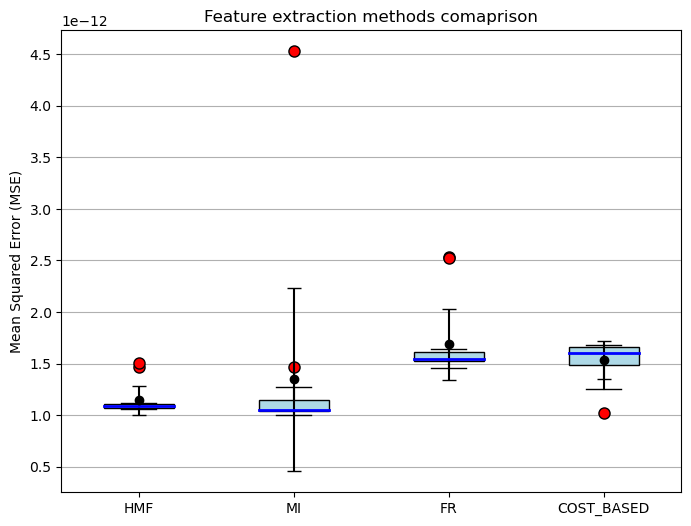

In [16]:
#BOX  PLOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df3=pd.read_csv("Data/RF_Perfrming_Zone.csv")#The perfoming zone mse and r2 loaded 
#The perfoming zone mse and r2 loaded
data_to_plot = [ df3["HMF_MSE"],df3["MI_MSE"],df3["FR_MSE"],df3["COST_MSE"]]

# Calculate the means and standard deviations
means = [np.mean(data) for data in data_to_plot]
stds = [np.std(data) for data in data_to_plot]

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8),
            medianprops=dict(color='blue', linewidth=2))

# Overlay bars for mean ± standard deviation
for i, (mean, std) in enumerate(zip(means, stds)):
    plt.errorbar(i + 1, mean, yerr=std, fmt='o', color='black', capsize=5)

# Add labels and title
plt.xticks([1, 2,3,4], [ "HMF","MI","FR","COST_BASED"])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Feature extraction methods comaprison")

# Display the plot
plt.grid(axis="y")
plt.show()



2.R2

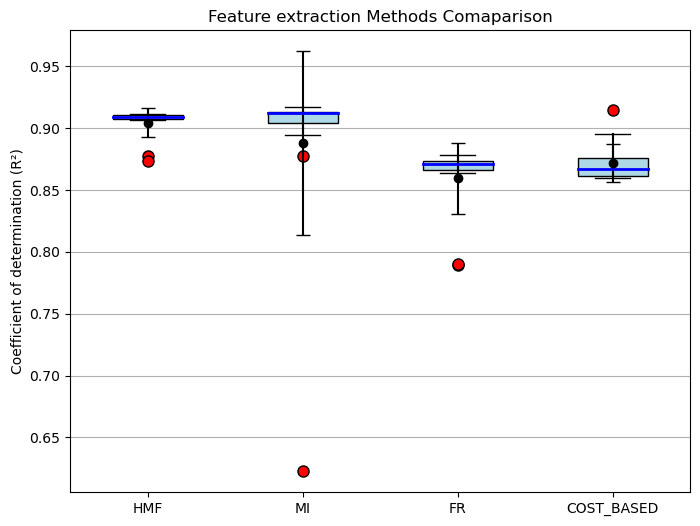

In [17]:

data_to_plot = [ df3["HMF_R2"],df3["MI_R2"],df3["FR_R2"],df3["COST_R2"]]

# Calculate the means and standard deviations
means = [np.mean(data) for data in data_to_plot]
stds = [np.std(data) for data in data_to_plot]

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8),
            medianprops=dict(color='blue', linewidth=2))

# Overlay bars for mean ± standard deviation
for i, (mean, std) in enumerate(zip(means, stds)):
    plt.errorbar(i + 1, mean, yerr=std, fmt='o', color='black', capsize=5)

# Add labels and title
plt.xticks([1, 2,3,4], [ "HMF","MI","FR","COST_BASED"])
plt.ylabel("Coefficient of determination (R²)")
plt.title("Feature extraction Methods Comaparison")

# Display the plot
plt.grid(axis="y")
plt.show()
